## Анализ удовлетворенности пассажиров авиакомпании (поиск инсайтов, составление рекомендаций стейкхолдерам, построение модели классификации удовлетворённости и лояльности пассажиров)



---





Набор данных,используемый в проекте, является общедоступным и получен с сайта  [kaggle.com](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction)

---





Данные содержат результаты опросов пассажиров авиакомпании об уровне удовлетворенности качеством услуг в виде оценок пассажиров и итоговой оценкой удовлетворения.

---



**Содержание данных:**

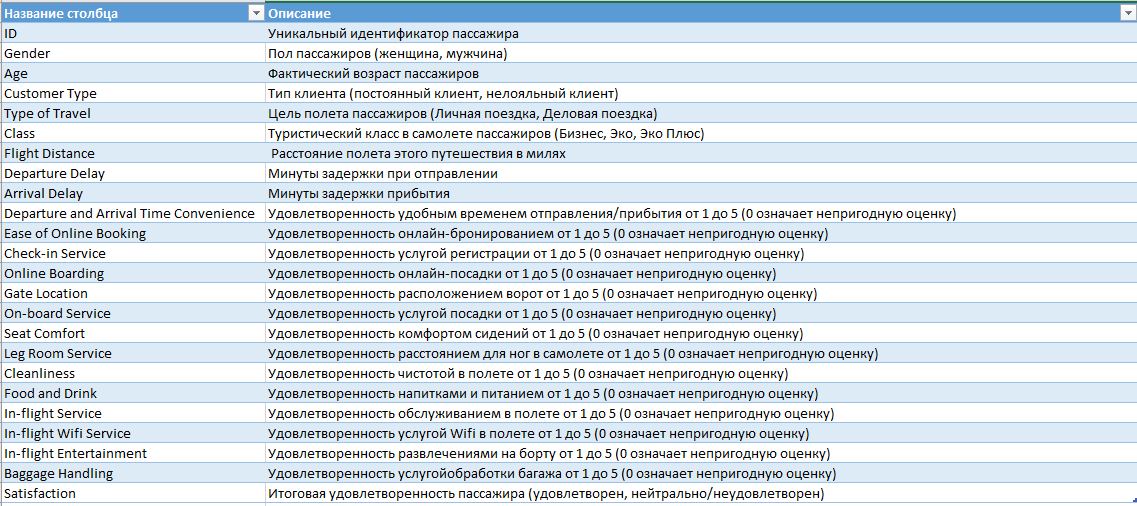

In [ ]:
from IPython.display import Image
Image('описание данных.PNG')

  
  **Задача работы:**

1. Понять, какие факторы и тематические оценки сильно коррелируют с удовлетворенностью пассажиров.

2. - Вывести образец удовлетворенного клиента
   - Вывести образец лояльного клиента
   - Построить модель для предсказания удовлетворенности пассажиров.
   - Построить модель для предсказания, станет ли пассажир, который летит первый раз, лояльным к компании.

3. Выявить узкие места в предоставляемых услугах и дать рекомендации по улучшению оценок пассажиров, влияющих на общую удовлетворенность авиакомпанией.

 **Актуальность работы:**
Удовлетворенность пассажиров услугами авиакомпании способствуют лояльности к компании: даже если клиенты сами не будут пользоваться услугами авиакомпании на постоянной основе, они скорее всего будут рекомендовать компанию своему кругу общения. Таким образом, авиакомпания не будет терять клиентов, появятся новые клиенты, которые также с высокой вероятностью станут лояльными. Соответственно вырастут объемы продаж и прибыль компании, а также, что немаловажно, репутация.

 **Гипотезы для проверки:**

- Улучшение метрики удовлетворенность пассажира способствует переходу пассажира в разряд лояльного.
- Улучшение наиболее значимо влияющих на уровень удовлетворенности оценок по видам услуг компании ведет к переходу пассажира в разряд удовлетворенного.

 **Метрики для проверки гипотез:**
- рост доли удовлетворенных пассажиров
- рост доли лояльных пассажиров

 **Пользователи результата данной работы:**
- руководители отделов, отвечающие за качество онлайн-бронирования
- руководители отделов, отвечающие за качество услуг на борту самолетов
- руководители отделов, отвечающие за качество услуг на территории аэропортов



**Предварительный анализ данных**


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

In [ ]:
#описание столбцов
data = pd.read_csv('data_dictionary.csv')
data

,Field,Description
0,ID,Unique passenger identifier
1,Gender,Gender of the passenger (Female/Male)
2,Age,Age of the passenger
3,Customer Type,Type of airline customer (First-time/Returning)
4,Type of Travel,Purpose of the flight (Business/Personal)
5,Class,Travel class in the airplane for the passenger...
6,Flight Distance,Flight distance in miles
7,Departure Delay,Flight departure delay in minutes
8,Arrival Delay,Flight arrival delay in minutes
9,Departure and Arrival Time Convenience,Satisfaction level with the convenience of the...


Факторы, которые могут влиять на оценки, расположены в столбцах 1-8.

Оценки начинаются со столбца 9. 

Итоговая удовлетворенность пассажиров в последнем столбце

In [ ]:
ratings = pd.read_csv('airline_passenger_satisfaction.csv')
ratings.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Проведем предварительный анализ данных, проверим их на пропуски и дубликаты

In [ ]:
ratings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Датасет состоит из 24 столбцов и 129880 строк. Строки, кроме времени задержки рейса, не имеют незаполненных значений. Однако из справочника к данным мы знаем, что возможны оценки 0, что по сути означает "нет данных" (0-непригодные оценки), поэтому для правильности расчетов их лучше заменить на обоснованное значение. Для этого необходимо выяcнить значения основных статистик в целом и по группам пассажиров.

Незаполненные значения по времени задержки рейса заполним нулями, т.к. при значимых задержках они скорее всего были бы заполнены. 

In [ ]:
ratings['Arrival Delay'].isna().sum()

393

In [ ]:
ratings['Arrival Delay'] = ratings['Arrival Delay'].fillna(0)

In [ ]:
ratings['Arrival Delay'].isna().sum()

0

In [ ]:
ratings.duplicated().sum()

0

Все данные уникальны, дубликатов не найдено

Поскольку уверенности в нормальности распределения оценок у нас пока нет, заполнять непригодные оценки будем медианным значением по группам удовлетворения пассажиров и подгруппам первых/лояльных клиентов.

In [ ]:
ratings[ratings['Departure and Arrival Time Convenience'] != 0].groupby(['Satisfaction', 'Customer Type']).median()['Departure and Arrival Time Convenience']

Satisfaction             Customer Type
Neutral or Dissatisfied  First-time       3.0
                         Returning        4.0
Satisfied                First-time       4.0
                         Returning        3.0
Name: Departure and Arrival Time Convenience, dtype: float64

Распространим гипотезу правильности заполнения нулевых оценок средними на остальные столбцы.

In [ ]:
ratings.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
rates = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [ ]:
for col in rates:
  for i in range(len(ratings)):
    if ratings[col][i] == 0:
      ratings[col][i] = np.nan

In [ ]:
ratings.isna().sum()

ID                                           0
Gender                                       0
Age                                          0
Customer Type                                0
Type of Travel                               0
Class                                        0
Flight Distance                              0
Departure Delay                              0
Arrival Delay                                0
Departure and Arrival Time Convenience    6681
Ease of Online Booking                    5682
Check-in Service                             1
Online Boarding                           3080
Gate Location                                1
On-board Service                             5
Seat Comfort                                 1
Leg Room Service                           598
Cleanliness                                 14
Food and Drink                             132
In-flight Service                            5
In-flight Wifi Service                    3916
In-flight Ent

In [ ]:
for col in rates:
  ratings[col] = ratings[col].fillna(ratings[ratings[col] != 0].groupby(['Satisfaction', 'Customer Type'])[col].transform('median'))

In [ ]:
ratings.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [ ]:
ratings.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

Теперь посмотрим на основные статистики факторов, которые могут влиять на оценки пассажиров

In [ ]:
ratings[['Age','Flight Distance', 'Departure Delay', 'Arrival Delay']].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465
std,15.119360,997.452477,38.071126,38.416353
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Средний возраст пассажиров 39,5 лет и примерно совпадает с медианой.

Перелеты осуществляются на расстояние от 31 до 4983 миль, в среднем на 1190 миль, медианное значение 844 мили. Разброс значений вокруг среднего достаточно большой, расстояния очень разные.

Задержка вылета до 1592 мин, но в среднем на 15 мин. Разброс вокруг среднего значения около 38мин.

Задержка прибытия до 1584 мин, в среднем на 15 мин. Разброс вокруг среднего значения около 38мин 

In [ ]:
ratings['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

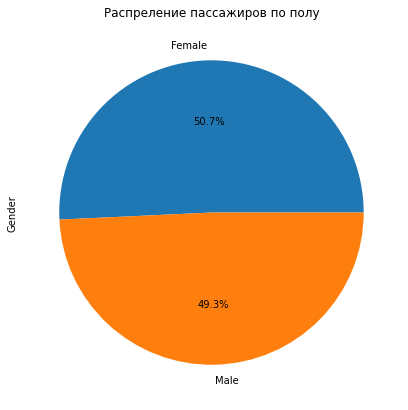

In [ ]:
ratings['Gender'].value_counts().plot(kind='pie', title='Распреление пассажиров по полу', autopct='%1.1f%%')

Примерно поровну распределение пассажиров по полу

In [ ]:
ratings['Customer Type'].value_counts()

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

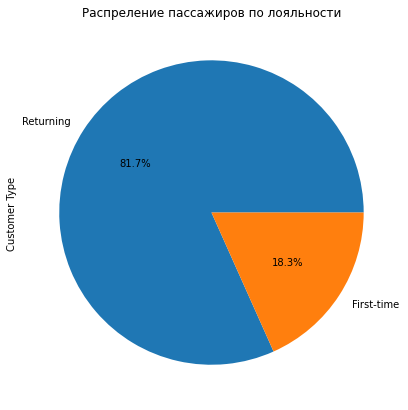

In [ ]:
ratings['Customer Type'].value_counts().plot(kind='pie', title='Распреление пассажиров по лояльности', autopct='%1.1f%%')

В основном пассажиры возвращаются к услугам авиакомпании.

In [ ]:
ratings['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

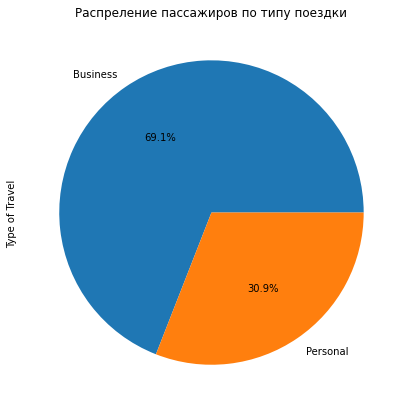

In [ ]:
ratings['Type of Travel'].value_counts().plot(kind='pie', title='Распреление пассажиров по типу поездки', autopct='%1.1f%%')

Около 70% деловые поездки, около 30% - личные

In [ ]:
ratings['Satisfaction'].mode()

0    Neutral or Dissatisfied
dtype: object

Удовлетворенность пассажиров чаще невысока. Рассмотрим этот показатель на графике.

In [ ]:
ratings['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

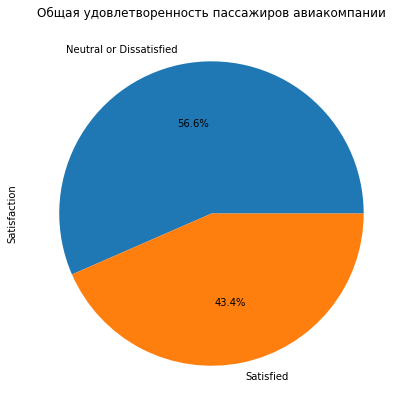

In [ ]:
ratings['Satisfaction'].value_counts().plot(kind='pie', title='Общая удовлетворенность пассажиров авиакомпании', autopct='%1.1f%%')

Действительно, визуально видно, что доля невысокого удовлетворения пассажиров превышает долю удовлетворенных.

Посмотрим, как выглядит удовлетворение пассажиров в зависимости от пола.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


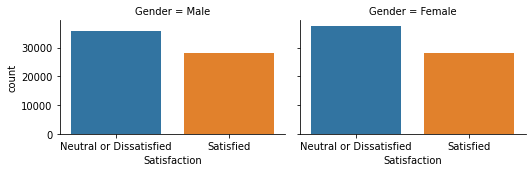

In [ ]:
sns.catplot('Satisfaction', col='Gender', col_wrap=2, data=ratings, kind='count', height=2.5, aspect=1.5) 

Видим, что степень удовлетворенности авиакомпанией среди пассажиров женского и мужского пола примерно равное, при этом неудовлетворение превышает удовлетворение.

А как выглядит удовлетворение пассажиров в зависимости от типа поездки?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


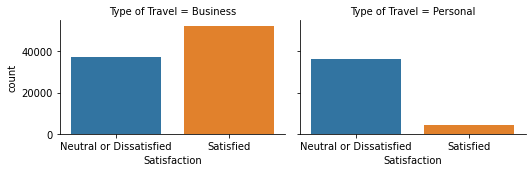

In [ ]:
sns.catplot('Satisfaction', col='Type of Travel', col_wrap=2, data=ratings, kind='count', height=2.5, aspect=1.5) 

Визуализация показывает, что среди личных поездок в основном пассажиры неудовлетворены.

Кроме того, у нас есть категории клиентов (повторные и новые)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


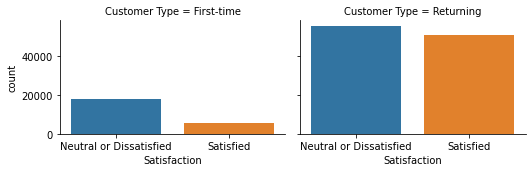

In [ ]:
sns.catplot('Satisfaction', col='Customer Type', col_wrap=2, data=ratings, kind='count', height=2.5, aspect=1.5)

А вот здесь мы видим, что новые клиенты больше неудовлетворены, но даже среди лояльных клиентов половина неудовлетворена услугами

Скорее всего на общую удовлетворенность пассажиров влияет класс перелета, где обычно уровень услуг выше на всех этапах по сравнению с эконом.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


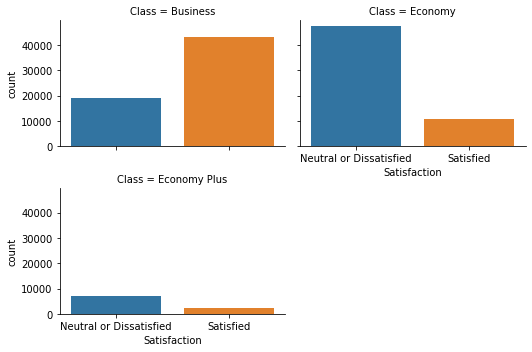

In [ ]:
sns.catplot('Satisfaction', col='Class', col_wrap=2, data=ratings, kind='count', height=2.5, aspect=1.5)

Это и показывают графики: класс перелета сильно влияет на окончательную оценку пассажиров, больше всего не нравятся услуги в эконом.

________________________________________________________________________________

Что же не нравится пассажирам? Из чего складываются оценки пасссажиров в такую общую оценку? 

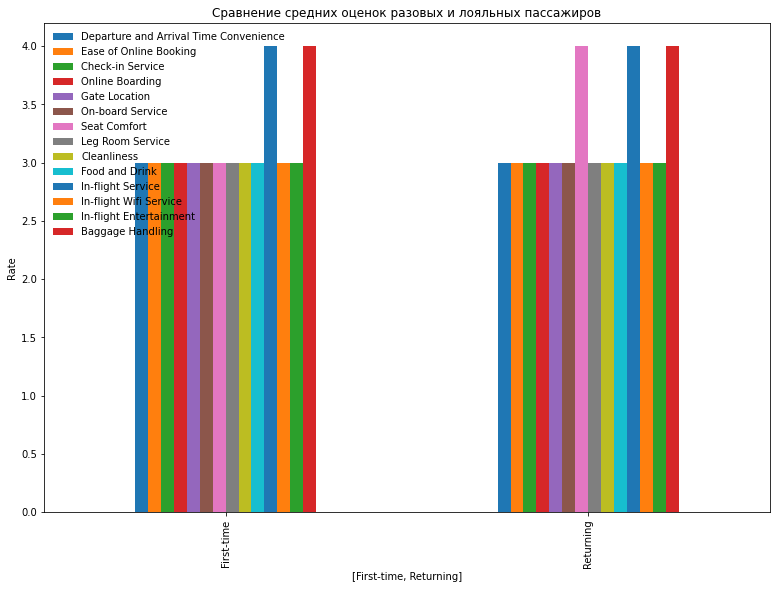

In [ ]:
group_rates = ratings.groupby('Customer Type').mean().round()[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]

group_rates.plot(kind='bar', xlabel=group_rates.index, ylabel='Rate', title='Сравнение средних оценок разовых и лояльных пассажиров')
plt.legend(loc='upper left', fancybox=True, framealpha=0)
rcParams['figure.figsize'] = 13,9

В основном оценки находятся на уровне 3

Лояльным клиентам нравится комфорт сидений, сервис на борту и обработка багажа.

Новым клиентам также нравится сервис на борту и обработка багажа.
 

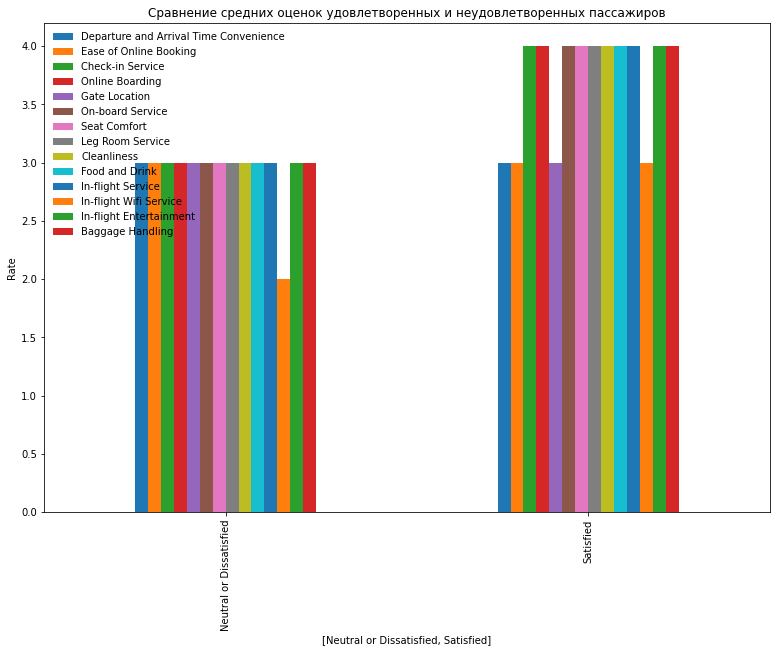

In [ ]:
group_rates = ratings.groupby('Satisfaction').mean().round()[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]

group_rates.plot(kind='bar', xlabel=group_rates.index, ylabel='Rate', title='Сравнение средних оценок удовлетворенных и неудовлетворенных пассажиров')
plt.legend(loc='upper left', fancybox=True, framealpha=0)
rcParams['figure.figsize'] = 13,9

На этом графике видно, что неудовлетворенные пассажиры жалуются на Wifi в полете, остальные оценки на уровне 3.

А удовлетворенные пассажиры довольны всем, кроме задержек, онлайн-бронирования, расположения ворот и также уровнем Wifi в полете.

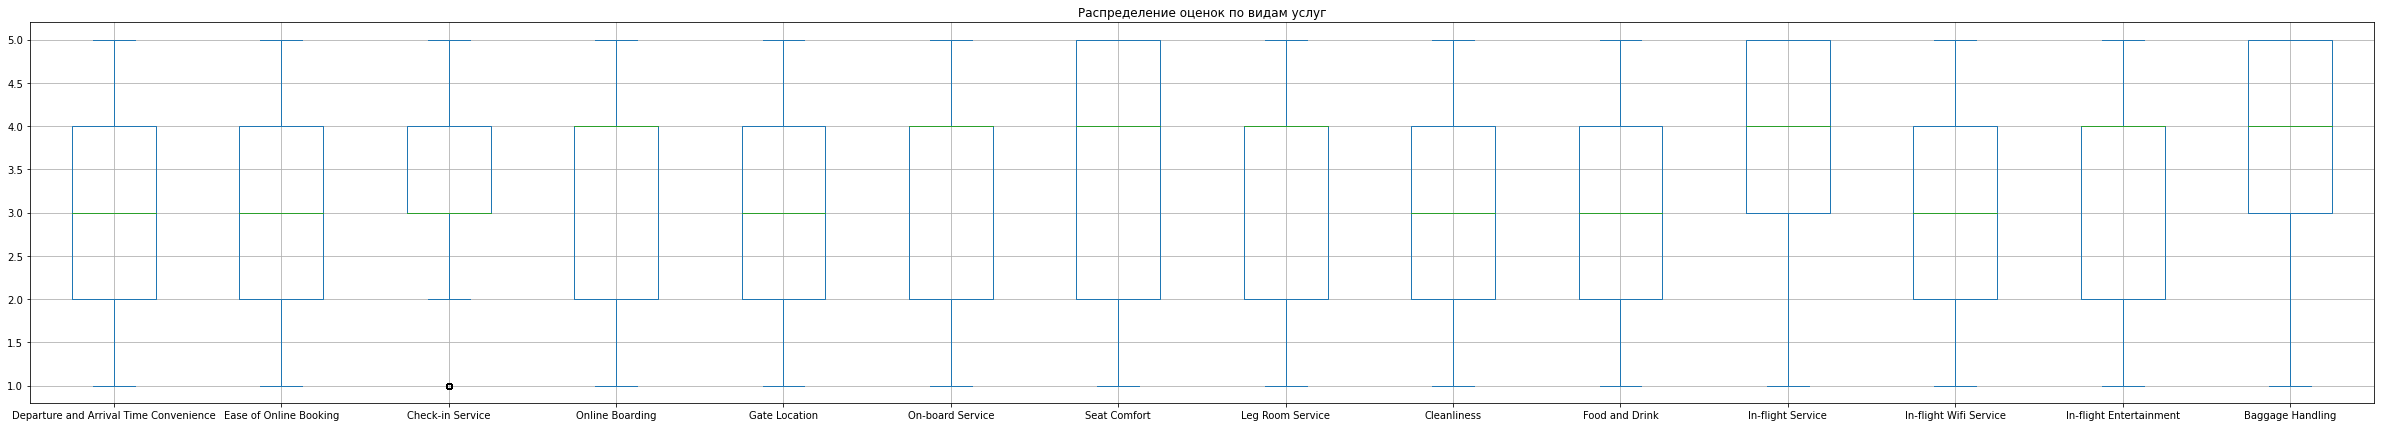

In [ ]:
ratings[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].plot(kind='box',title='Распределение оценок по видам услуг', grid=True)
rcParams['figure.figsize'] = 42,7

В целом по пассажирам видим, что с сервисом на борту и обработкой багажа все хорошо. Разброс значений комфорта сидений скорей всего связан с классом перелета.

Компании стоит поработать над удобством онлайн-бронирования, чтобы повысить медианную оценку.

Что касается задержек, расположения ворот: есть ли возможность улучшить качество этих услуг?

В полете улучшить качество услуг по чистоте и питанию/напиткам.
 

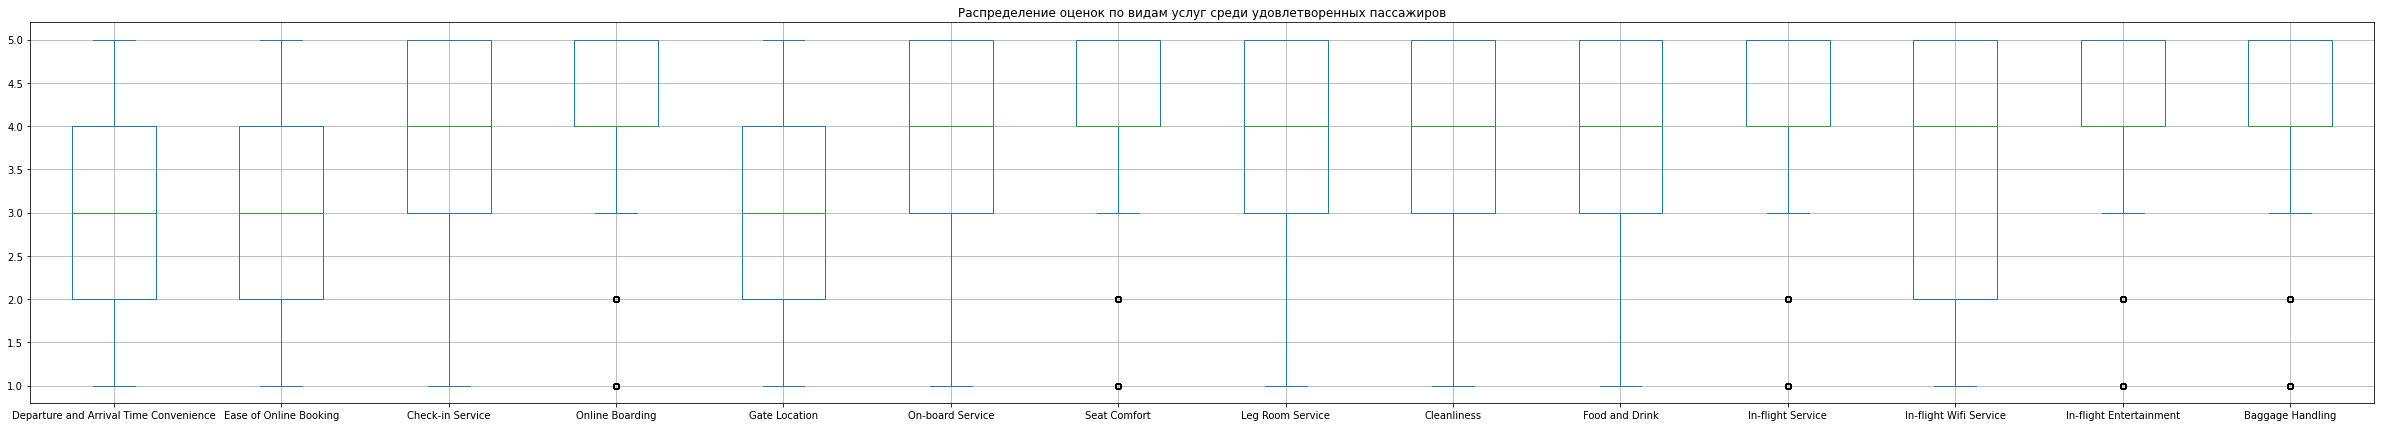

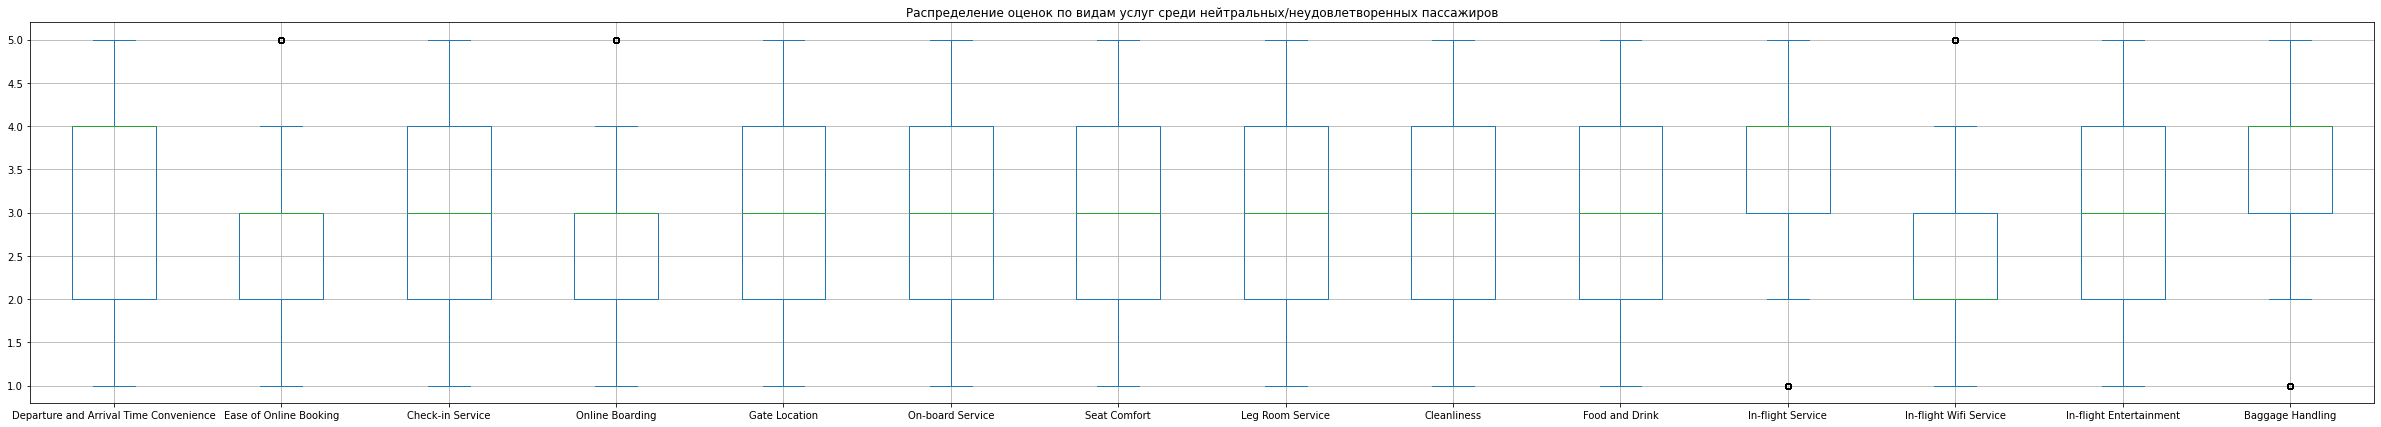

In [ ]:
ratings[ratings['Satisfaction'] == 'Satisfied'][['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].plot(kind='box',title='Распределение оценок по видам услуг среди удовлетворенных пассажиров', grid=True)

ratings[ratings['Satisfaction'] == 'Neutral or Dissatisfied'][['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].plot(kind='box',title='Распределение оценок по видам услуг среди нейтральных/неудовлетворенных пассажиров', grid=True)

rcParams['figure.figsize'] = 42,7

Есть выбросы низких оценок(1 и 2) по услуге онлайн-бординга, комфорта сиденья, сервиса в полете, развлечений и обработки багажа среди удовлетворенных пассажиров. 

Однако высоко оценивается большинство остальных услуг, кроме задержек рейса, удобства брони и расположения ворот.

Нейтральным пассажирам больше всего не нравится бронирование, онлайн-бординг и wifi на борту.

In [ ]:
median_rates = ratings[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].median().to_frame().reset_index()
median_rates = median_rates.rename(columns={'index': 'service', 0: 'median_rates'}).sort_values(by='median_rates')
median_rates.style.bar(align='mid')

,service,median_rates
0,Departure and Arrival Time Convenience,3.000000
1,Ease of Online Booking,3.000000
2,Check-in Service,3.000000
4,Gate Location,3.000000
8,Cleanliness,3.000000
9,Food and Drink,3.000000
11,In-flight Wifi Service,3.000000
3,Online Boarding,4.000000
5,On-board Service,4.000000
6,Seat Comfort,4.000000


Подтверждаются предыдущие исследования: необходимо работать с задержками рейсов, удобством бронирования, регистрации на рейс, расположением ворот, чистотой в полете, питанием/напитками в полете, wifi в полете .

Из этого набора плохих медианных оценок компания может повлиять на систему бронирования и регистрации на рейс, доработав сайт,приложение авиакомпании.Улушить качество оказания  услуг регистрации на рейс в аэропортах.

Кроме того, в силах авиакомпании добиться чистоты в полете и улучшения сервиса по питанию и напиткам на борту.

________________________________________________________________________________

In [ ]:
ratings[['Customer Type', 'Satisfaction']].corr()

Наша гипотеза состоит в том, что лояльность пассажиров и их удовлетворенность (и наоборот) скорее всего связаны друг с другом. 

Для проверки корреляции приведем удовлетворенных клиентов к значению 1, неудовлетворенных к значению 0, а также первых пассажиров к значению 0, повторных к значению 1.

In [ ]:
for i in range(len(ratings)):
  if ratings['Satisfaction'][i] == 'Satisfied':
    ratings['Satisfaction'][i] = 1
  else:
    ratings['Satisfaction'][i] = 0  

In [ ]:
for i in range(len(ratings)):
  if ratings['Customer Type'][i] == 'First-time':
    ratings['Customer Type'][i] = 0
  else:
    ratings['Customer Type'][i] = 1

In [ ]:
ratings.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,0,Business,Business,821,2,5.0,3.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,0
1,2,Female,35,1,Business,Business,821,26,39.0,2.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,1
2,3,Male,41,1,Business,Business,853,0,0.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,1
3,4,Male,50,1,Business,Business,1905,0,0.0,2.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,1
4,5,Female,49,1,Business,Business,3470,0,1.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,1


In [ ]:
ratings[['Satisfaction', 'Customer Type']].astype('int').corr()

,Satisfaction,Customer Type
Satisfaction,1.000000,0.186017
Customer Type,0.186017,1.000000


Как показал критерий корреляции, это не так. Нет сильной связи между удовлетворением и лояльностью пассажиров.

# Построение модели

Построим модель, которая могла бы предсказать, станет ли пассажир с определенными оценками удовлетворенным или нет.

Признаки: оценки по услугам авиакомпании. Целевая переменная: удовлетворенность клиента.

In [ ]:
ratings['Satisfaction'] = pd.to_numeric(ratings['Satisfaction'])

In [ ]:
ratings

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,0,Business,Business,821,2,5.0,3.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,0
1,2,Female,35,1,Business,Business,821,26,39.0,2.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,1
2,3,Male,41,1,Business,Business,853,0,0.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,1
3,4,Male,50,1,Business,Business,1905,0,0.0,2.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,1
4,5,Female,49,1,Business,Business,3470,0,1.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,1,Personal,Economy Plus,447,2,3.0,4.0,...,5.0,1.0,4.0,4.0,4.0,5.0,4.0,4.0,4,0
129876,129877,Male,41,1,Personal,Economy Plus,308,0,0.0,5.0,...,5.0,2.0,5.0,2.0,2.0,4.0,3.0,2.0,5,0
129877,129878,Male,42,1,Personal,Economy Plus,337,6,14.0,5.0,...,3.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,5,0
129878,129879,Male,50,1,Personal,Economy Plus,337,31,22.0,4.0,...,4.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,5,1


Поскольку наша целевая зависимая переменная является категориальной, будем использовать модель дискриминантного анализа.

Важно, чтобы признаки(оценки по отдельным видам услуг не были сильно скоррелированы друг с другом. Проверим это с помощью тепловой карты.

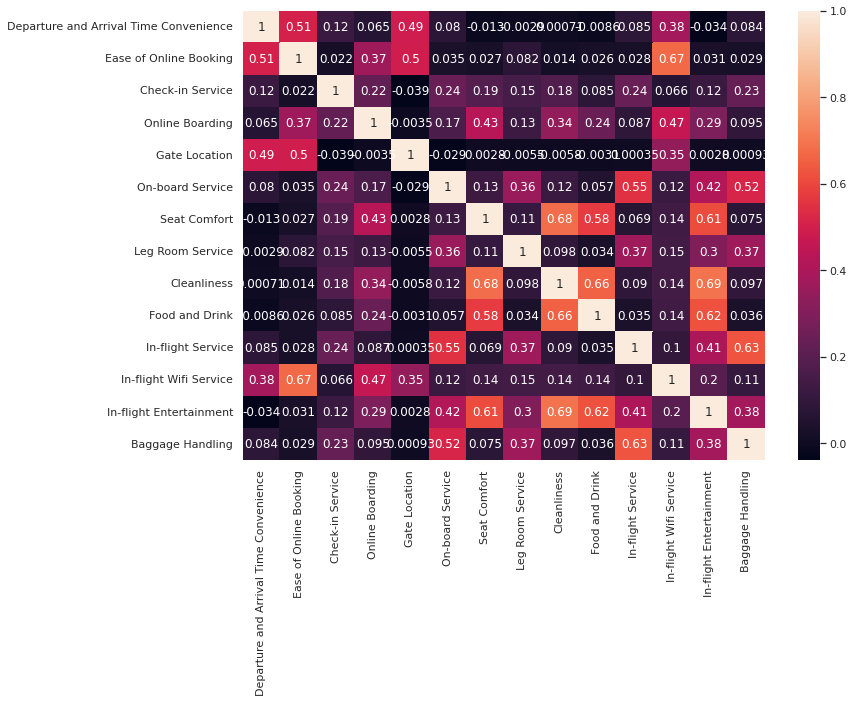

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.heatmap(ratings[rates].corr(), annot=True)

Из признаков уберем комфорт сидений, развлечения на борту и уровень wifi на борту, т.к. наблюдается их достаточно сильная корреляция с другими признаками и компания не может на них влиять, поскольку качество этих услуг зависит от вида самолета.

In [ ]:
rates_ = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'Baggage Handling']

In [ ]:
X,y=ratings[rates_],ratings['Satisfaction'].values

In [ ]:
X

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,Baggage Handling
0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,5.0,5.0,5.0,5
1,2.0,2.0,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5
2,4.0,4.0,4.0,5.0,4.0,3.0,3.0,5.0,5.0,3.0,3
3,2.0,2.0,3.0,4.0,2.0,5.0,5.0,4.0,4.0,5.0,5
4,3.0,3.0,3.0,5.0,3.0,3.0,4.0,5.0,4.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...
129875,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0,5.0,4
129876,5.0,3.0,5.0,3.0,4.0,5.0,5.0,2.0,2.0,4.0,5
129877,5.0,2.0,4.0,2.0,1.0,3.0,4.0,3.0,3.0,4.0,5
129878,4.0,4.0,3.0,4.0,1.0,4.0,5.0,3.0,3.0,4.0,5


In [ ]:
y

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ratings[rates_], ratings['Satisfaction'].values, test_size=0.25, random_state=42)

In [ ]:
len(y_test)

32470

Убедимся, что классы пассажиров в выборках перемешаны, неупорядочены

In [ ]:
print(f"Классы в y_train:\n{y_train[:10]}")
print(f"Классы в y_test:\n{y_test[:10]}")

Классы в y_train:
[0 0 1 1 1 1 1 0 0 1]
Классы в y_test:
[0 1 1 1 1 0 0 1 0 1]


Равномерно ли распределено количество классов в наборах данных, разделенных для обучения и тестирования?

In [ ]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}. Соотношение {np.bincount(y_train)[1]/np.bincount(y_train)[0]}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}.  Соотношение {np.bincount(y_test)[1]/np.bincount(y_test)[0]}")

Количество строк в y_train по классам: [55004 42406]. Соотношение 0.7709621118464112
Количество строк в y_test по классам: [18448 14022].  Соотношение 0.7600823937554206


Количество классов в обеих выборках распределено равномерно.

Приступаем к построению модели. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])

Модель дискриминантного анализа построена, обучена и сделан прогноз на тестовой выборке. Посмотрим, как повела себя модель.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8226054819833692

Точность модели составила 82%. Это достаточно хороший результат. 

На матрице можно увидеть, как отработала модель, сколько дала верных ответов

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, lda.predict(X_test))
cm

array([[15455,  2993],
       [ 2767, 11255]])

Text(0.5, 1.0, 'Accuracy Score: <function accuracy_score at 0x7f19aa7d4e60>')

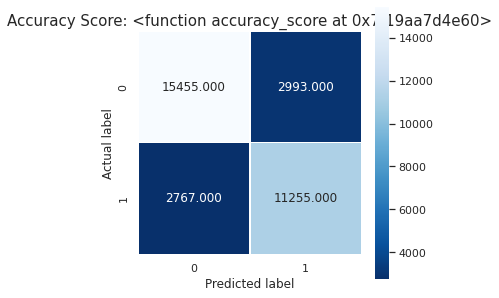

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15)

Как вариант посмотрим на модель логистической регрессии.

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test)
predictions = logisticRegr.predict(X_test)

In [ ]:
score = logisticRegr.score(X_test, y_test)
score

0.8248229134585772

In [ ]:
from sklearn import metrics
cm_1 = metrics.confusion_matrix(y_test, predictions)
cm_1

array([[15673,  2775],
       [ 2913, 11109]])

Text(0.5, 1.0, 'Accuracy Score: 0.8248229134585772')

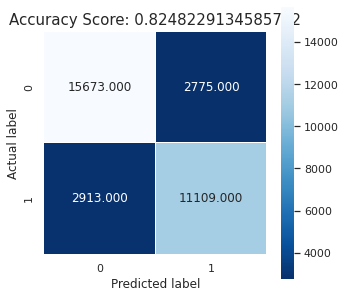

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

Логистическая регрессия работает примерно также.

Попробуем наши модели для предсказания, будет ли клиент с определенными оценками услуг лояльным и есть ли шанс, что пассажиры, осуществляющие перелет в первый раз, вернутся в компанию.

In [ ]:
ratings['Customer Type'] = pd.to_numeric(ratings['Customer Type'])

In [ ]:
X,y=ratings[rates_],ratings['Customer Type'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ratings[rates_], ratings['Customer Type'].values, test_size=0.25, random_state=42)

In [ ]:
print(f"Классы в y_train:\n{y_train[:15]}")
print(f"Классы в y_test:\n{y_test[:15]}")

Классы в y_train:
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
Классы в y_test:
[0 1 1 1 0 1 1 1 1 1 1 0 1 1 1]


In [ ]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}. Соотношение {np.bincount(y_train)[1]/np.bincount(y_train)[0]}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}.  Соотношение {np.bincount(y_test)[1]/np.bincount(y_test)[0]}")

Количество строк в y_train по классам: [17800 79610]. Соотношение 4.472471910112359
Количество строк в y_test по классам: [ 5980 26490].  Соотношение 4.429765886287625


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.8123498614105328

С точностью 81% модель линейного дискриминантного анализа сможет предсказать лояльность пассажира. 

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test)
predictions = logisticRegr.predict(X_test)

In [ ]:
score = logisticRegr.score(X_test, y_test)
score

0.8122574684323991

Логистическая регрессия работает практически также, как и ЛДА.

Таким образом, для предсказания удовлетворенности пассажиров можно использовать LDA или логистическую регрессию примерно с одинаковой эффективностью. Модели помогут решить задачу классификации клиентов компании по уровню удовлетворенности на основании выставленных оценок по видам услуг и оперативно смотреть тенденцию удовлетворенности пассажиров и принимать меры к увеличению доли удовлетворенных клиентов и снижению доли неудовлетворенных.

Использование построенных моделей для классификации пассажиров по лояльности поможет понять, станет ли пассажир лояльным к компании на основе его оценок, вернется ли в компанию. Увеличение доли лояльных пассажиров, их рекомендации своему кругу общения будет способствовать привлечению новых пассажиров.